In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
plt.rcParams['figure.dpi'] = 300

In [3]:
from sklearn.linear_model import Ridge, LinearRegression, Lasso, RidgeCV, LassoCV

In [4]:
from sklearn.model_selection import cross_val_score

In [5]:
from sklearn.datasets import load_boston
boston = load_boston()

In [6]:
from sklearn.utils import shuffle
X, y = boston.data, boston.target
X, y = shuffle(X, y)

In [7]:
X.shape

(506, 13)

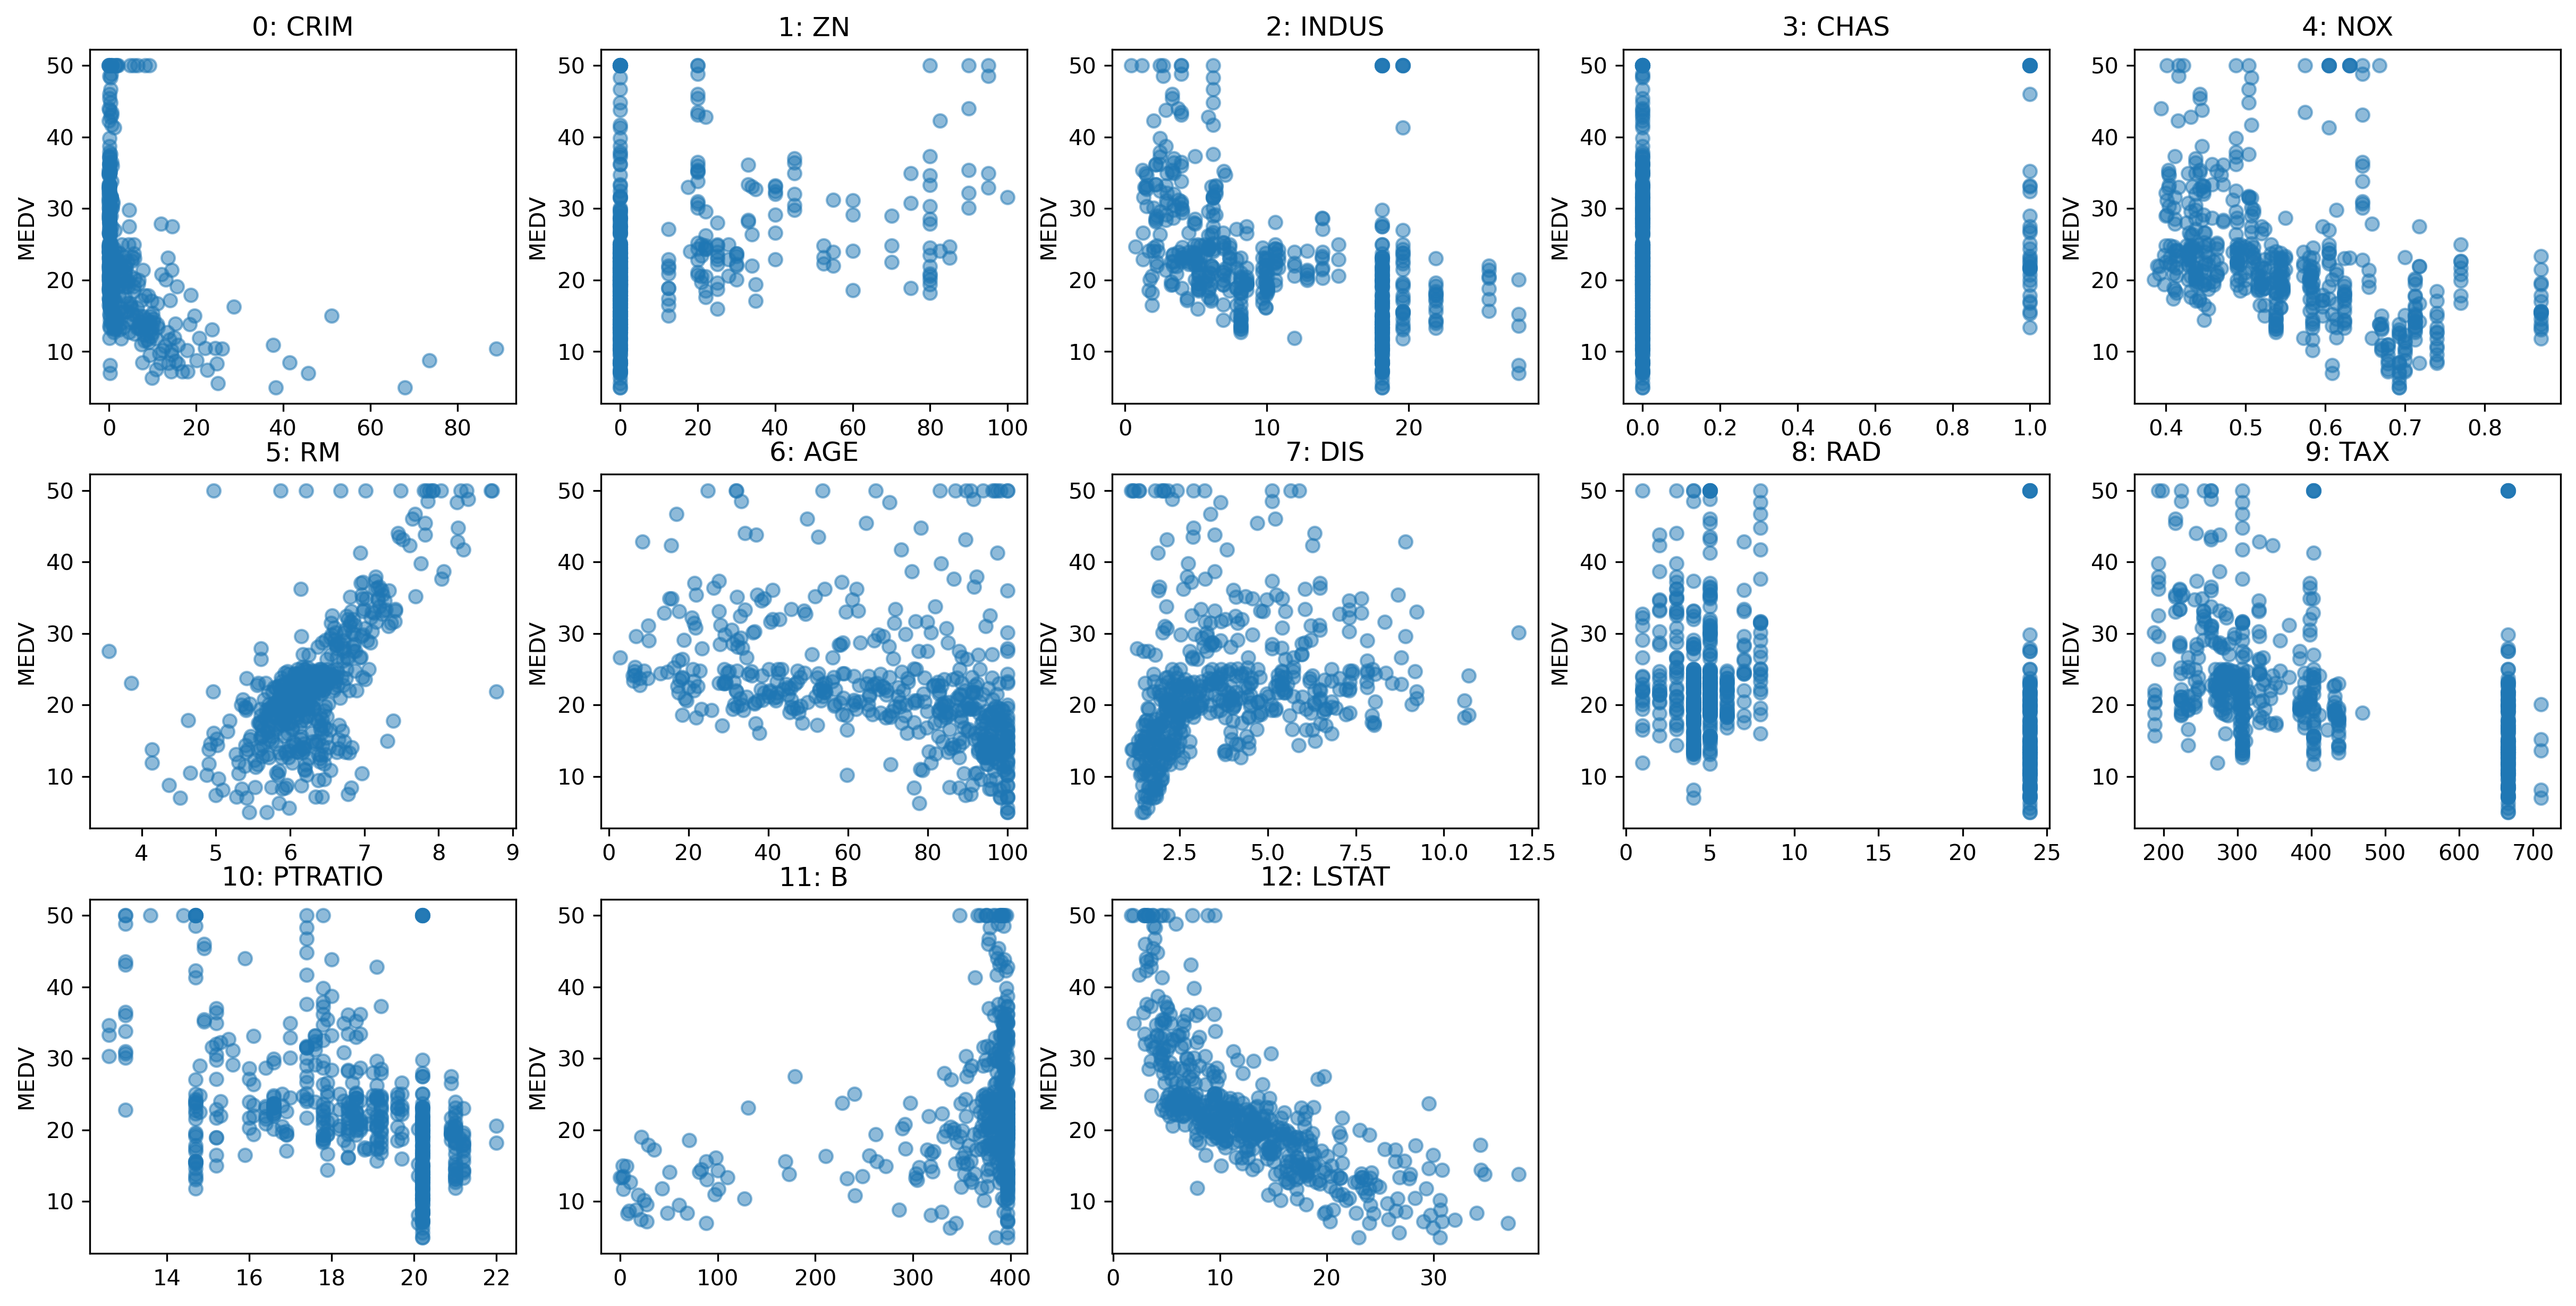

In [8]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.plot(X[:, i], y, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, boston.feature_names[i]))
    ax.set_ylabel("MEDV")

In [9]:
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
np.mean(cross_val_score(LinearRegression(), X_train, y_train, cv=10))

0.6913266577007386

In [12]:
np.mean(cross_val_score(Ridge(), X_train, y_train, cv=10))

0.6899417897023594

In [13]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': np.logspace(-3, 3, 14)}
print(param_grid)

{'alpha': array([1.00000000e-03, 2.89426612e-03, 8.37677640e-03, 2.42446202e-02,
       7.01703829e-02, 2.03091762e-01, 5.87801607e-01, 1.70125428e+00,
       4.92388263e+00, 1.42510267e+01, 4.12462638e+01, 1.19377664e+02,
       3.45510729e+02, 1.00000000e+03])}


In [14]:
grid = GridSearchCV(Ridge(), param_grid, return_train_score=True, cv=10)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-03, 2.89426612e-03, 8.37677640e-03, 2.42446202e-02,
       7.01703829e-02, 2.03091762e-01, 5.87801607e-01, 1.70125428e+00,
       4.92388263e+00, 1.42510267e+01, 4.12462638e+01, 1.19377664e+02,
       3.45510729e+02, 1.00000000e+03])},
             return_train_score=True)

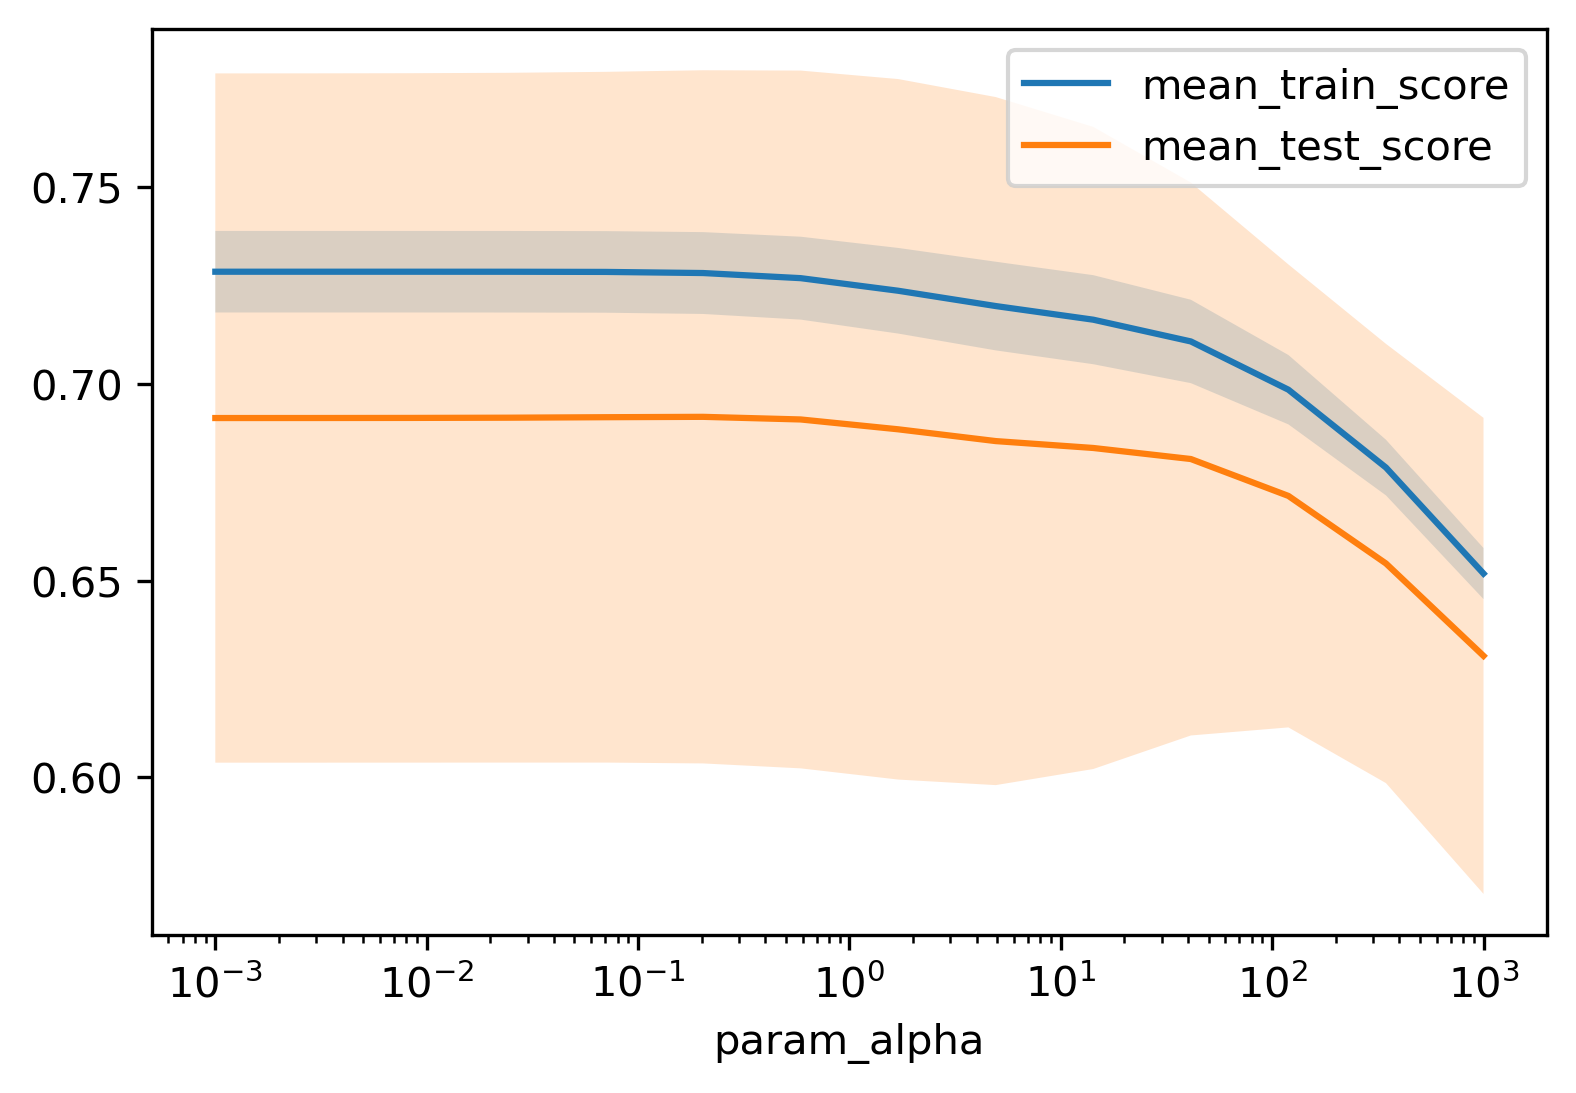

In [15]:
import pandas as pd
results = pd.DataFrame(grid.cv_results_)
results.plot('param_alpha', 'mean_train_score')
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()
plt.xscale("log")

In [16]:
from sklearn.preprocessing import PolynomialFeatures, scale
X_poly = PolynomialFeatures(include_bias=False).fit_transform(scale(X))
print(X_poly.shape)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=42)

(506, 104)


In [17]:
np.mean(cross_val_score(LinearRegression(), X_train, y_train, cv=10))

0.7616502762341126

In [18]:
np.mean(cross_val_score(Ridge(), X_train, y_train, cv=10))

0.8029194214514945

In [19]:
grid = GridSearchCV(Ridge(), param_grid, return_train_score=True, cv=10)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-03, 2.89426612e-03, 8.37677640e-03, 2.42446202e-02,
       7.01703829e-02, 2.03091762e-01, 5.87801607e-01, 1.70125428e+00,
       4.92388263e+00, 1.42510267e+01, 4.12462638e+01, 1.19377664e+02,
       3.45510729e+02, 1.00000000e+03])},
             return_train_score=True)

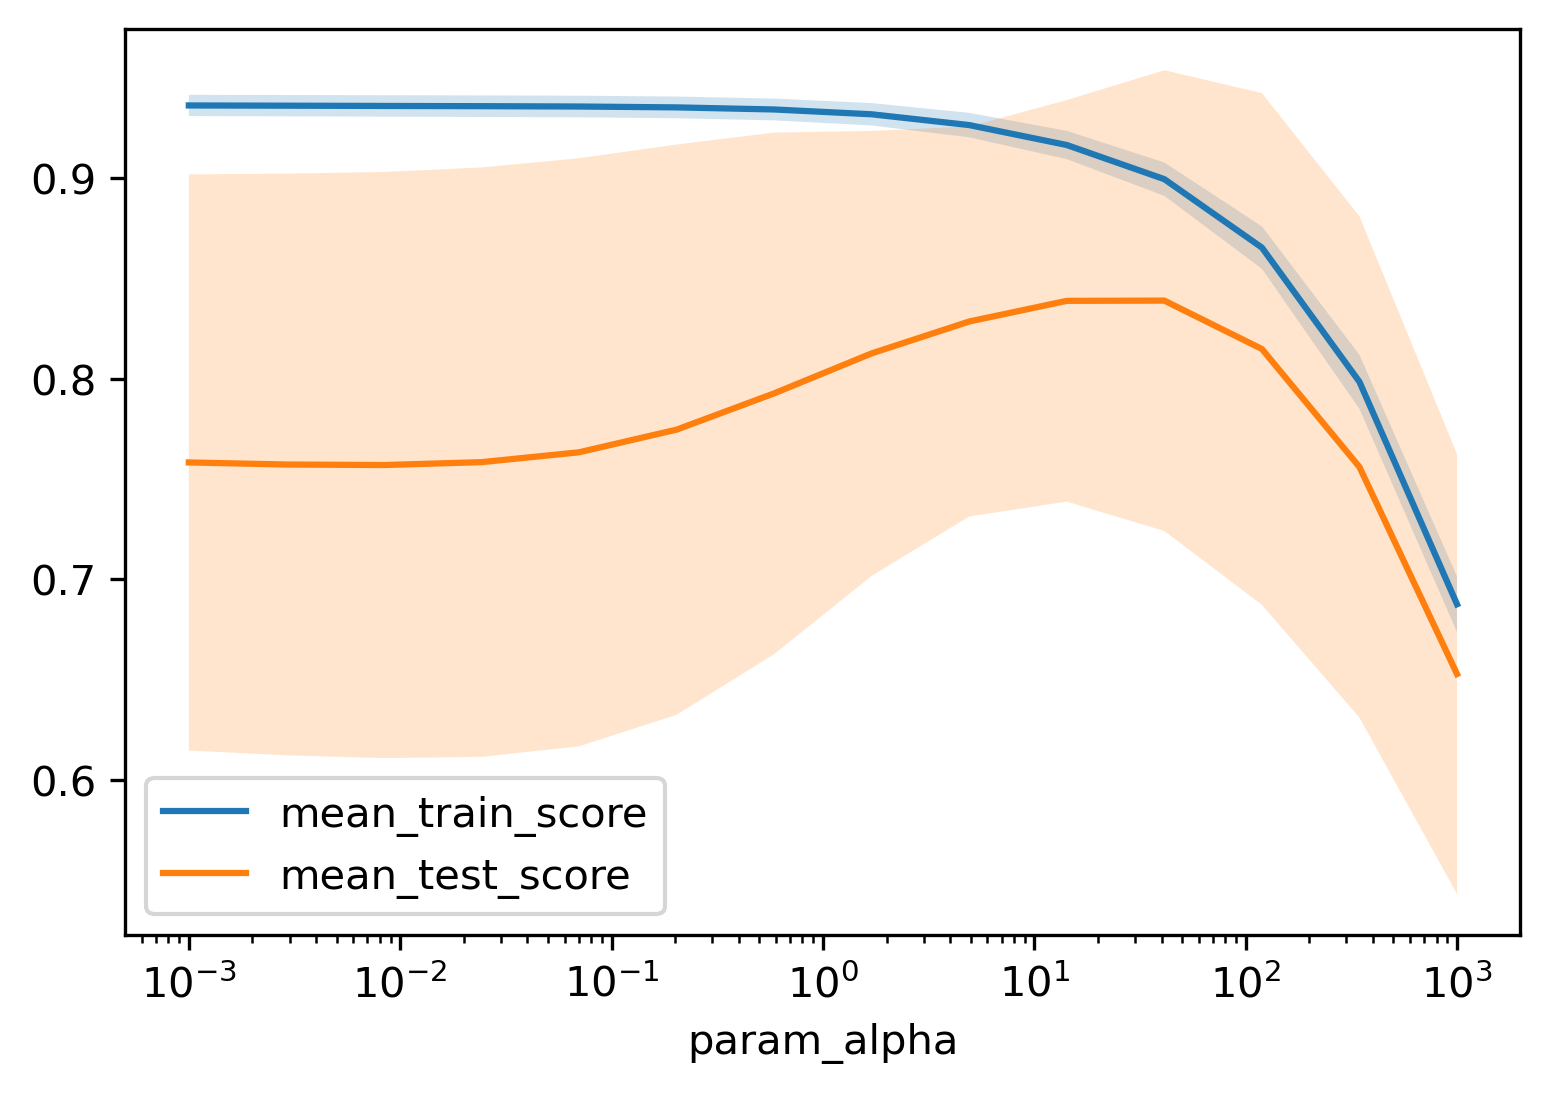

In [20]:
results = pd.DataFrame(grid.cv_results_)
results.plot('param_alpha', 'mean_train_score')
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()
plt.xscale("log")

In [21]:
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 41.246263829013564}
0.8390219667983791


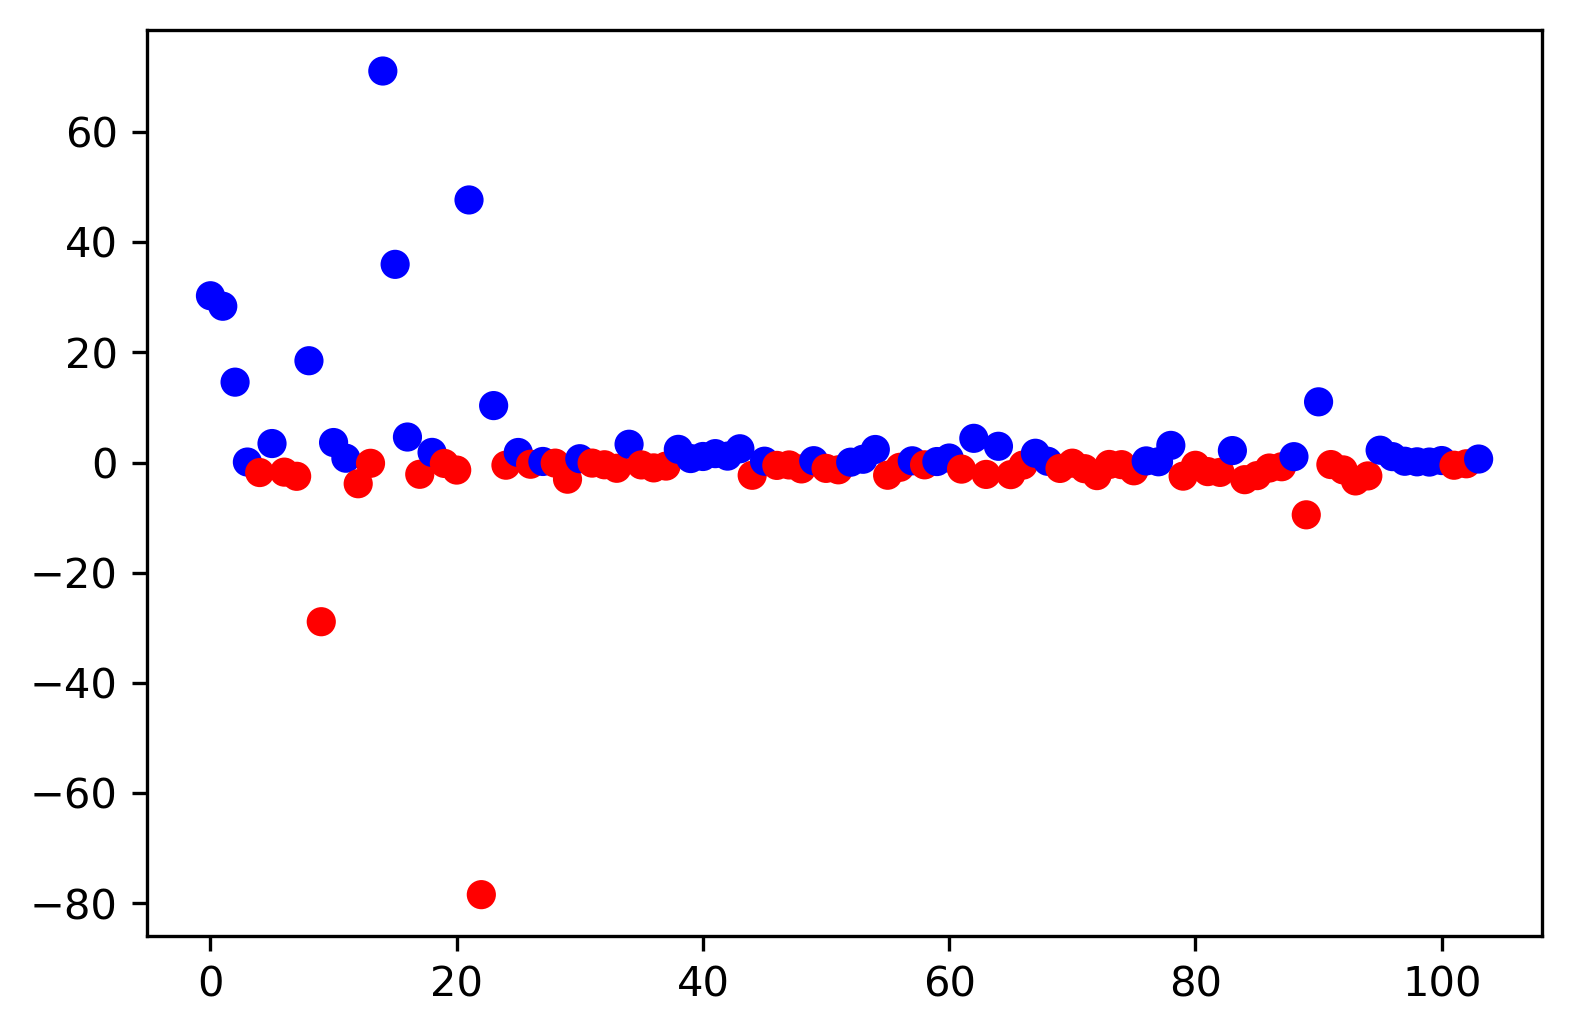

In [27]:
lr = LinearRegression().fit(X_train, y_train)
plt.scatter(range(X_poly.shape[1]), lr.coef_, c=np.sign(lr.coef_), cmap="bwr_r")

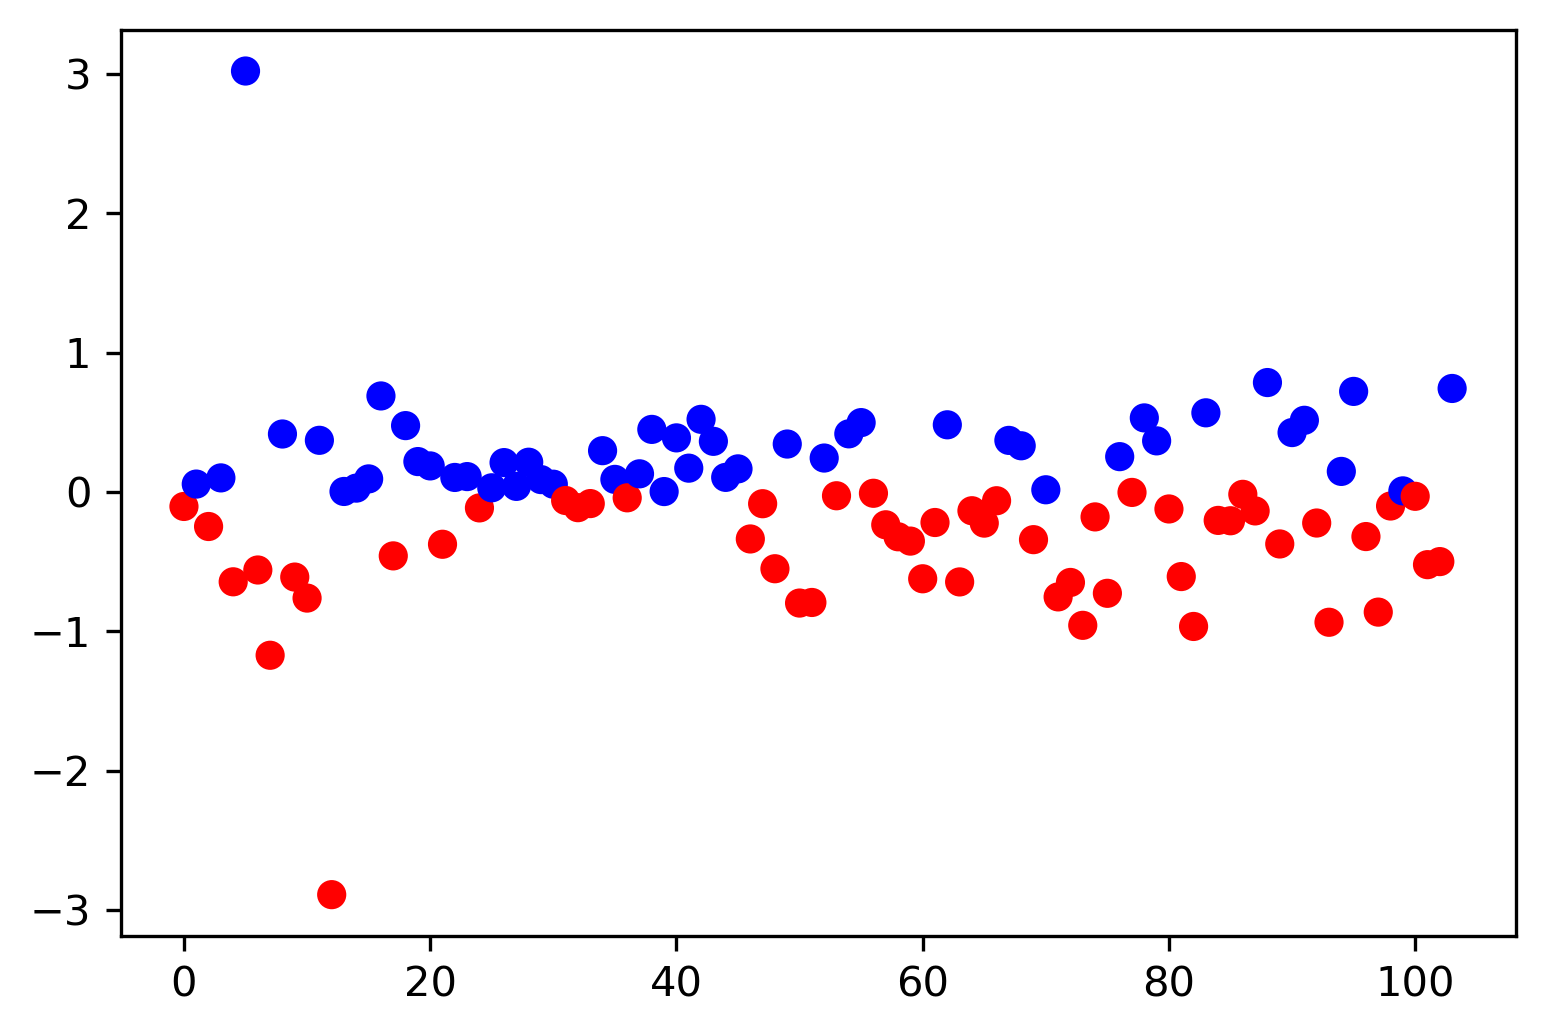

In [23]:
ridge = grid.best_estimator_
plt.scatter(range(X_poly.shape[1]), ridge.coef_, c=np.sign(ridge.coef_), cmap="bwr_r")

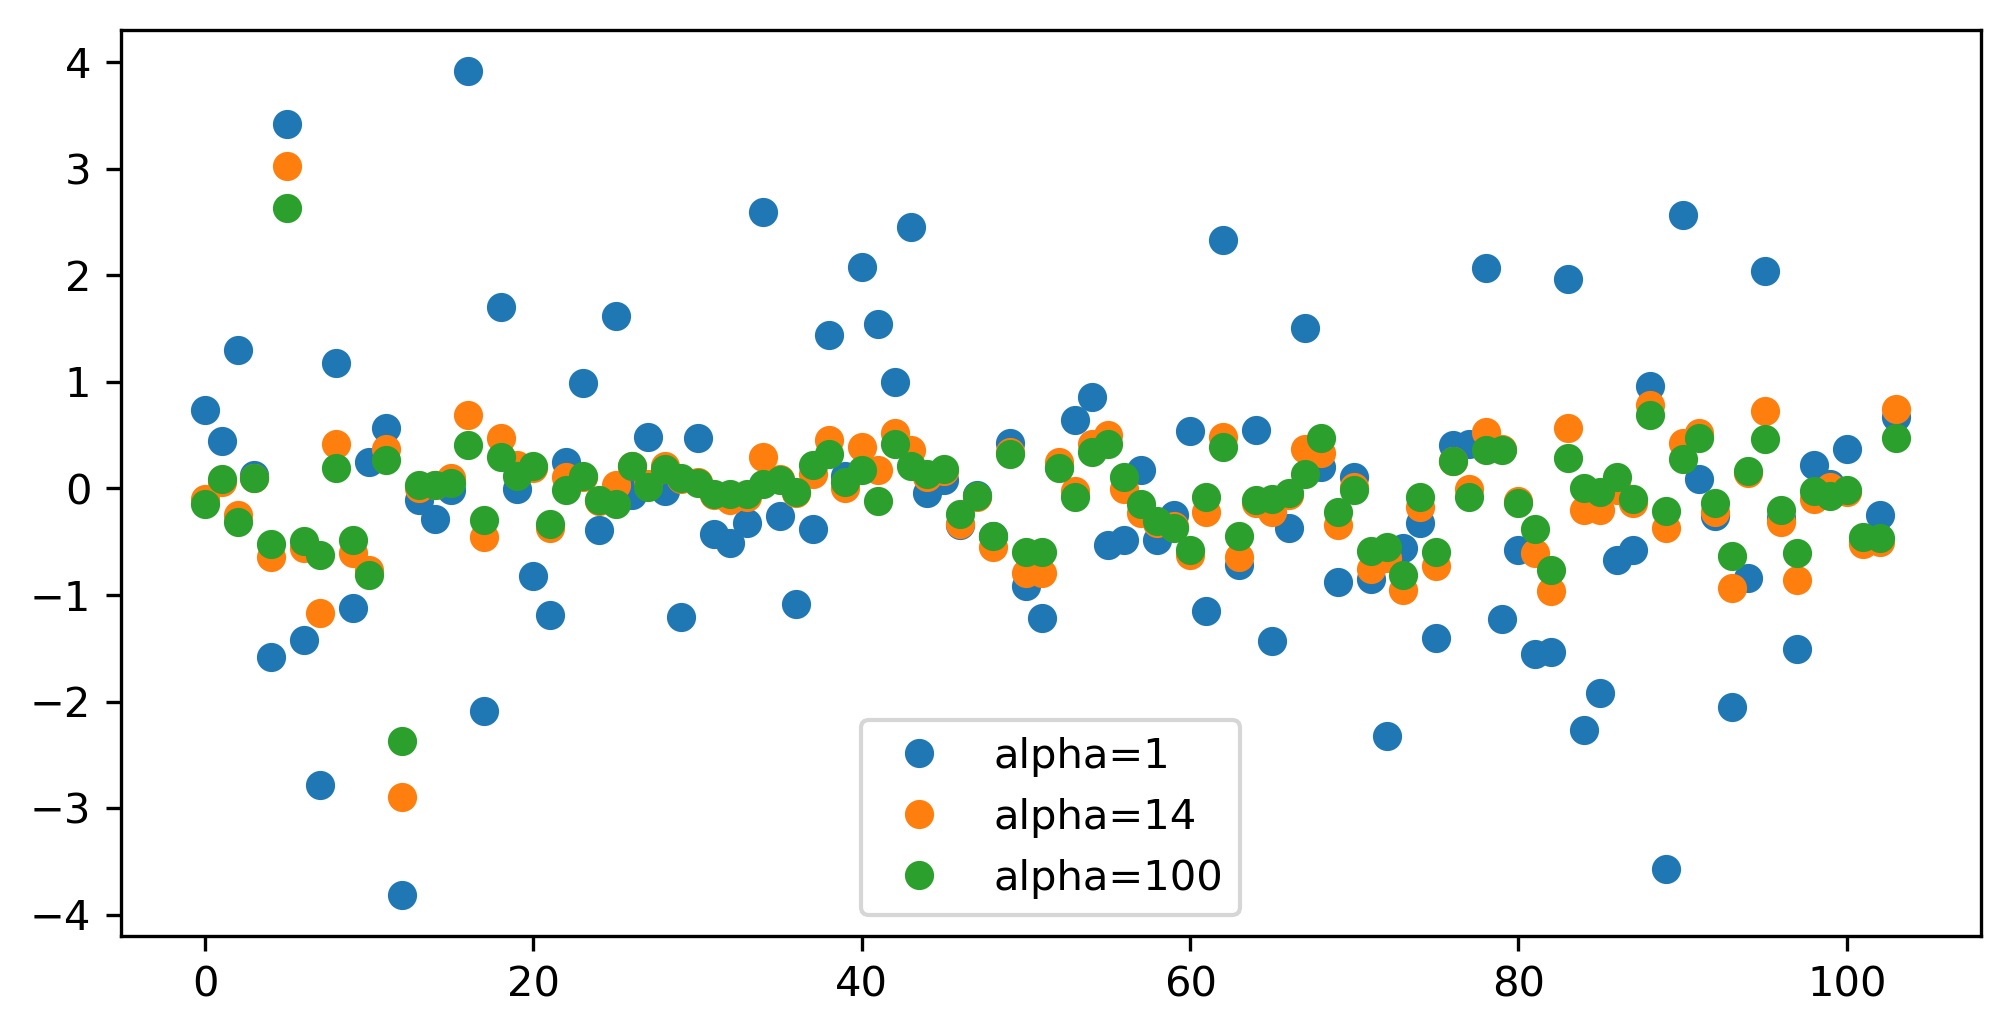

In [24]:
ridge100 = Ridge(alpha=100).fit(X_train, y_train)
ridge1 = Ridge(alpha=1).fit(X_train, y_train)
plt.figure(figsize=(8, 4))

plt.plot(ridge1.coef_, 'o', label="alpha=1")
plt.plot(ridge.coef_, 'o', label="alpha=14")
plt.plot(ridge100.coef_, 'o', label="alpha=100")
plt.legend()

Text(0, 0.5, 'coefficient')

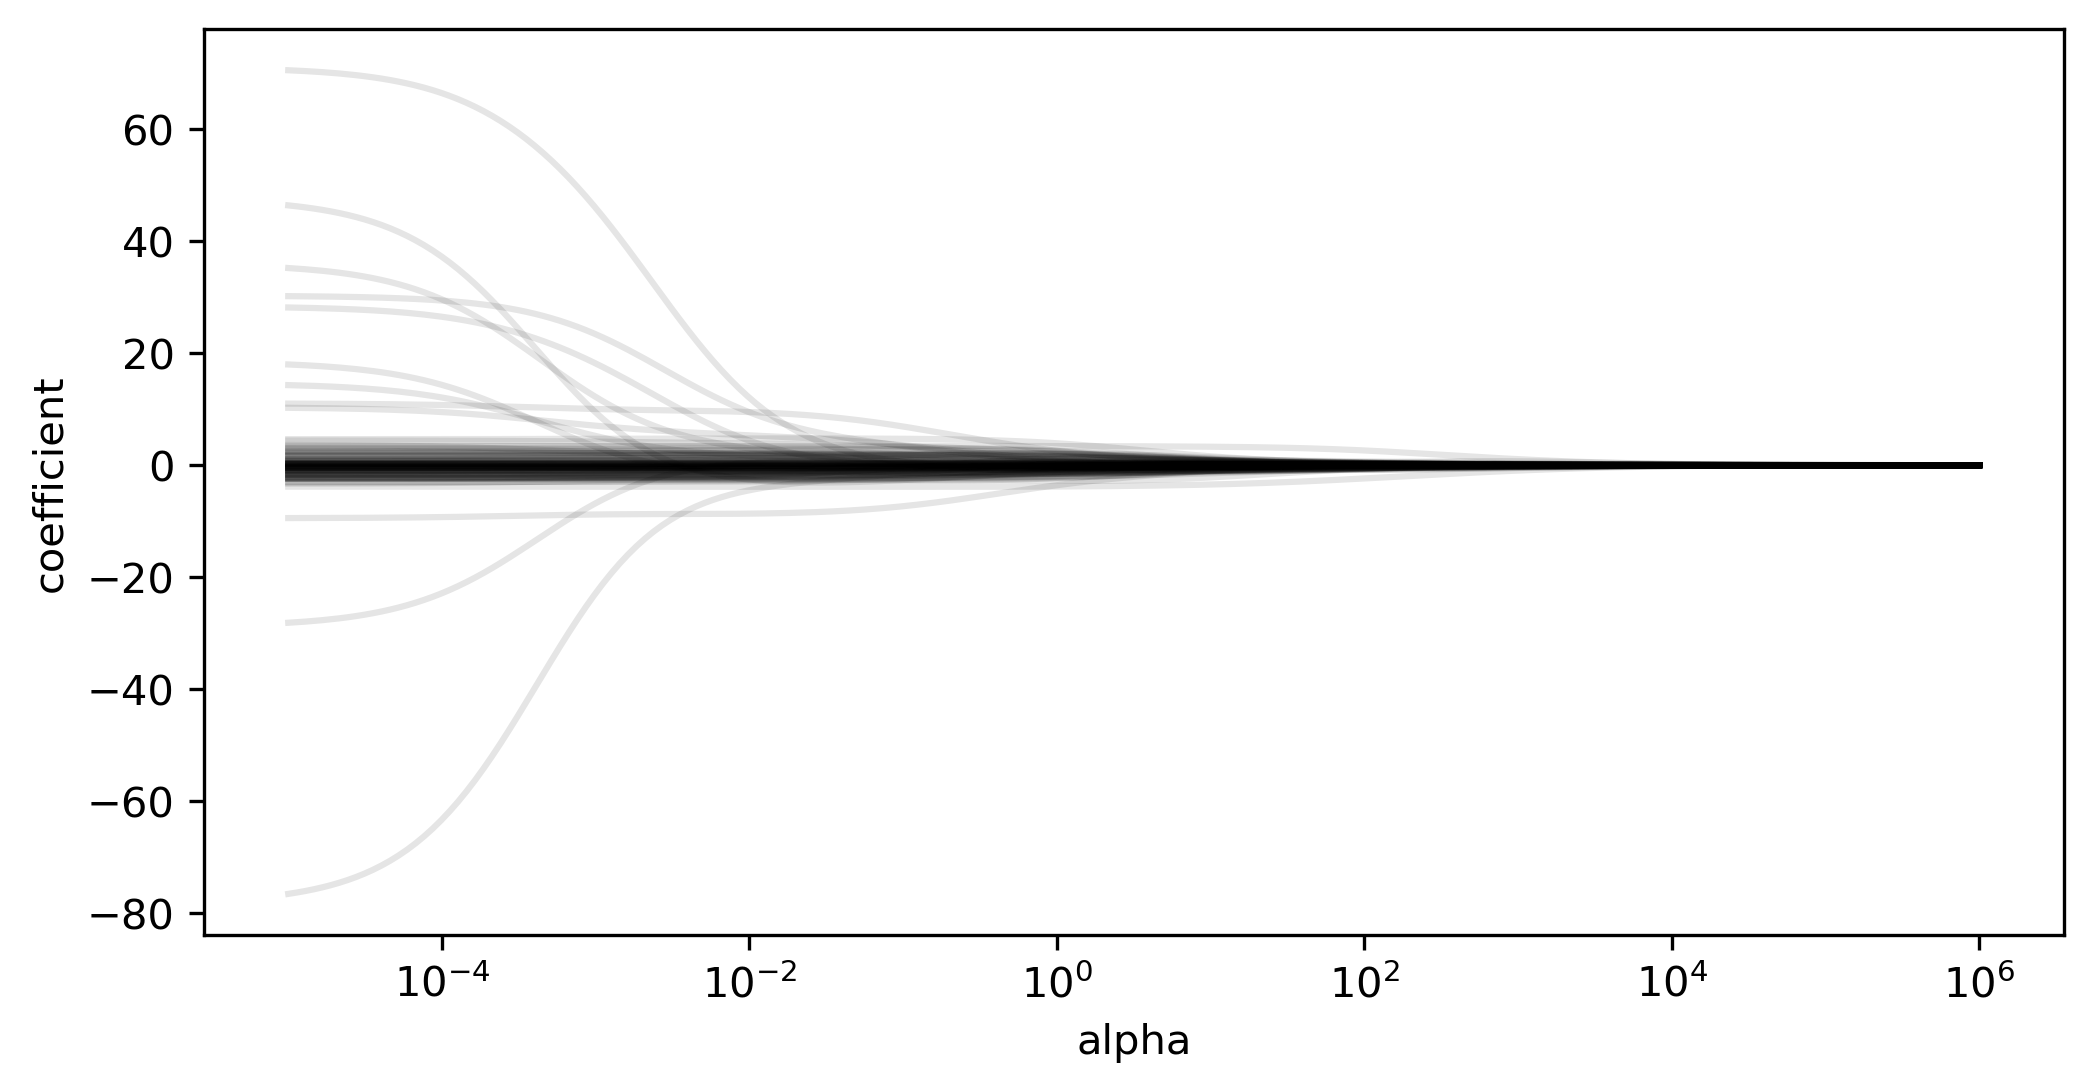

In [25]:
n_alphas = 200
alphas = np.logspace(-5, 6, n_alphas)
plt.figure(figsize=(8, 4))
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

plt.plot(alphas, coefs, c='k', alpha=.1)
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("coefficient")

Text(0, 0.5, 'R^2')

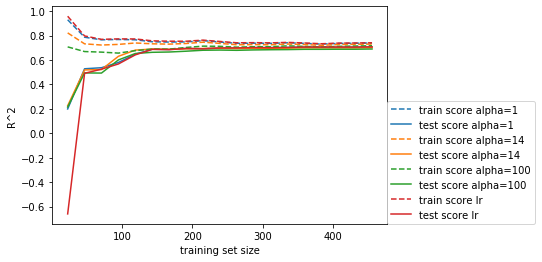

In [25]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(est, name):
    train_set_size, train_scores, test_scores = learning_curve(est, X, y, cv=10, train_sizes=np.linspace(0, 1, 20)[1:])
    test_mean = test_scores.mean(axis=1)
    train_mean = train_scores.mean(axis=1)
    line, = plt.plot(train_set_size, train_mean, linestyle="--", label="train score {}".format(name))
    plt.plot(train_set_size, test_mean, label="test score {}".format(name),
             c=line.get_color())
    
plot_learning_curve(Ridge(alpha=1), "alpha=1")
plot_learning_curve(Ridge(alpha=14), "alpha=14")
plot_learning_curve(Ridge(alpha=100), "alpha=100")

plot_learning_curve(LinearRegression(), "lr")
plt.legend(loc=(1, 0))
plt.xlabel("training set size")
plt.ylabel("R^2")

In [26]:
X.shape

(506, 13)

# Lasso

In [27]:
param_grid = {'alpha': np.logspace(-3, 0, 14)}
print(param_grid)

{'alpha': array([0.001     , 0.00170125, 0.00289427, 0.00492388, 0.00837678,
       0.01425103, 0.02424462, 0.04124626, 0.07017038, 0.11937766,
       0.20309176, 0.34551073, 0.58780161, 1.        ])}


In [28]:
grid = GridSearchCV(Lasso(normalize=True, max_iter=1e6), param_grid, return_train_score=True, cv=10)
grid.fit(X_train, y_train)

/home/stevan/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000000.0, normalize=True, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([0.001     , 0.00170125, 0.00289427, 0.00492388, 0.00837678,
       0.01425103, 0.02424462, 0.04124626, 0.07017038, 0.11937766,
       0.20309176, 0.34551073, 0.58780161, 1.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

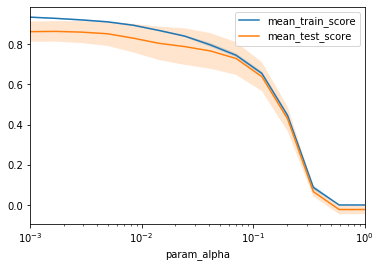

In [29]:
results = pd.DataFrame(grid.cv_results_)
results.plot('param_alpha', 'mean_train_score')
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()
plt.xscale("log")

In [30]:
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 0.0017012542798525892}
0.8635965732147822


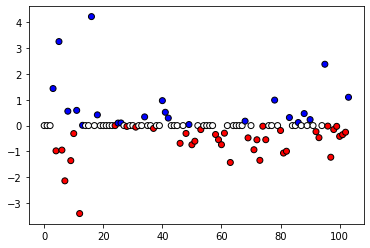

In [31]:
lasso = grid.best_estimator_
plt.scatter(range(X_poly.shape[1]), lasso.coef_, c=np.sign(lasso.coef_), cmap="bwr_r", edgecolor='k')

In [32]:
print(X_poly.shape)
np.sum(lasso.coef_ != 0)

(506, 104)


60

In [33]:
from sklearn.linear_model import lars_path
# lars_path computes the exact regularization path which is piecewise linear.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
alphas, active, coefs = lars_path(X_train, y_train, eps=0.00001, method="lasso")

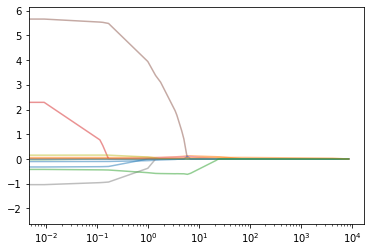

In [34]:
plt.plot(alphas, coefs.T, alpha=.5)
plt.xscale("log")

# Robust models

In [35]:
from sklearn.linear_model import HuberRegressor, RANSACRegressor

In [36]:

from sklearn.datasets import make_regression


n_samples = 1000
n_outliers = 50


X, y, coef = make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=0)

# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

# Fit line using all data
model = LinearRegression()
model.fit(X, y)

line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = model.predict(line_X)

Text(0, 0.5, 'response')

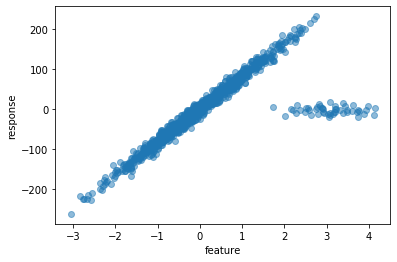

In [37]:
plt.scatter(X, y, alpha=.5)
plt.xlabel("feature")
plt.ylabel("response")

Text(0, 0.5, 'response')

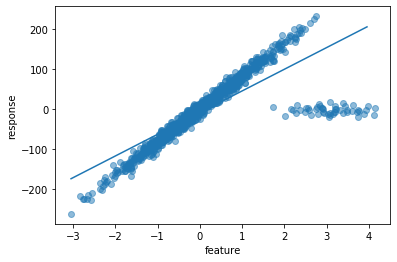

In [38]:
plt.scatter(X, y, alpha=.5)
plt.plot(line_X, line_y, label="Linear Regression fit")
plt.xlabel("feature")
plt.ylabel("response")

Text(0, 0.5, 'response')

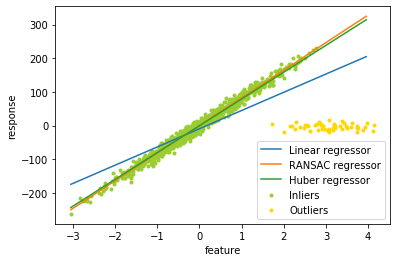

In [39]:
model_ransac = RANSACRegressor()

model_ransac.fit(X, y)
inlier_mask = model_ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)


huber = HuberRegressor().fit(X, y)

# Predict data of estimated models

line_y_ransac = model_ransac.predict(line_X)
line_y_huber = huber.predict(line_X)


plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.',
            label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.',
            label='Outliers')
plt.plot(line_X, line_y, label='Linear regressor')
plt.plot(line_X, line_y_ransac, label='RANSAC regressor')
plt.plot(line_X, line_y_huber, label='Huber regressor')
plt.legend(loc='lower right')
plt.xlabel("feature")
plt.ylabel("response")

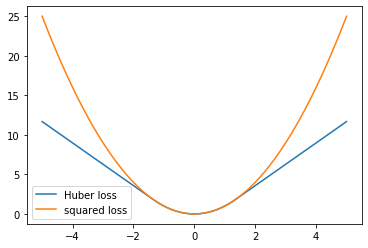

In [40]:
def huber_loss(x):
    eps = 1.35
    mask = np.abs(x) < eps
    res = 2 * eps * np.abs(x) - eps**2
    res[mask] = x[mask] ** 2
    return res

line = np.linspace(-5, 5, 100)
plt.plot(line, huber_loss(line), label="Huber loss")
plt.plot(line, line ** 2, label="squared loss")
plt.legend()

# RANSAC

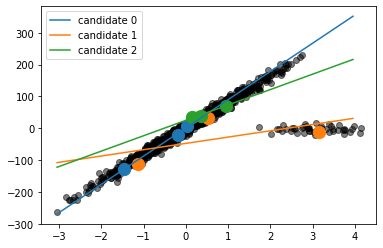

In [41]:
rng = np.random.RandomState(0)
plt.scatter(X, y, c='k', alpha=.5)
candidates = []
for i in range(3):
    perm = rng.permutation(X.shape[0])[:3]
    X_sample, y_sample = X[perm], y[perm]
    candidate = LinearRegression().fit(X_sample, y_sample)
    candidates.append(candidate)
    line, = plt.plot(line_X, candidate.predict(line_X), label="candidate {}".format(i))
    plt.scatter(X_sample, y_sample, c=line.get_color(), s=150)
plt.legend()

In [42]:
residual_threshold = np.median(np.abs(y - np.median(y)))

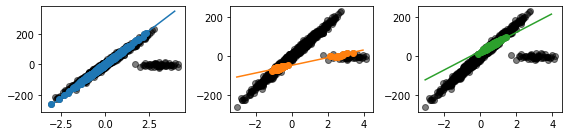

In [43]:
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
fig, axes = plt.subplots(1, 3, figsize=(8, 2))
for ax, candidate, c in zip(axes, candidates, colors):
    residuals = (y - candidate.predict(X)) ** 2
    inliers = residuals < residual_threshold
    ax.scatter(X, y, c='k', alpha=.5)
    line, = ax.plot(line_X, candidate.predict(line_X), label="candidate {}".format(i), c=c)
    ax.scatter(X[inliers], y[inliers], c=c)
plt.tight_layout()

In [44]:
colors

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']